In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm

Dados los datos de unidades de masa vendidas por semana y de el costo al momento de la venta, se quiere predecir la venta conociendo el costo

In [2]:
datos = pd.read_excel('../data_series.xlsx')
datos['FECHAS'] = pd.to_datetime(datos['FECHAS'])
datos['FECHAS']

0     2018-01-07
1     2018-01-14
2     2018-01-21
3     2018-01-28
4     2018-02-04
         ...    
234   2022-07-03
235   2022-07-10
236   2022-07-17
237   2022-07-24
238   2022-07-31
Name: FECHAS, Length: 239, dtype: datetime64[ns]

In [3]:
datos = datos.dropna()
inf = datos['VENTA'].mean() - 2*datos['VENTA'].std()
sup = datos['VENTA'].mean() + 2.5*datos['VENTA'].std()
datos = datos.loc[datos['VENTA'] >= inf, :].copy()
datos = datos.loc[datos['VENTA'] <= sup, :].copy()

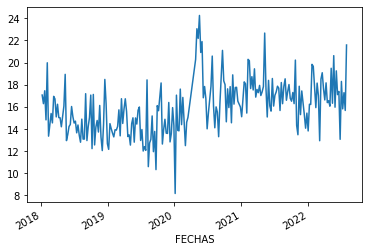

In [4]:
datos.set_index('FECHAS')['COSTO'].plot.line()
plt.show()

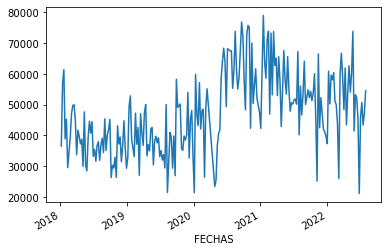

In [5]:
datos.set_index('FECHAS')['VENTA'].plot.line()
plt.show()

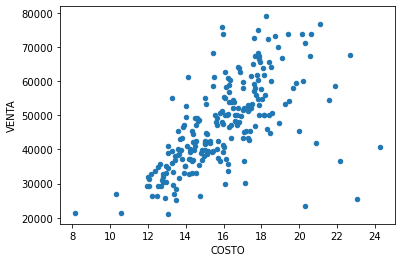

In [6]:
datos.plot.scatter('COSTO', 'VENTA')
plt.show()

In [7]:
modelo_1 = smf.ols('VENTA ~ COSTO-1', data=datos)
r_1 = modelo_1.fit()
r_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  VENTA   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              5249.
Date:                Thu, 18 Aug 2022   Prob (F-statistic):                   6.74e-159
Time:                        18:58:53   Log-Likelihood:                         -2422.2
No. Observations:                 228   AIC:                                      4846.
Df Residuals:                     227   BIC:                                      4850.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
COSTO       2961.8853     40.883     72.448      0.000    2881.327    3042.444
==============================================================================
Omnibus:                       18.562   Durbin-Watson:                   0.905
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.664
Skew:                          -0.302   Prob(JB):                     7.36e-11
Kurtosis:                       5.132   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

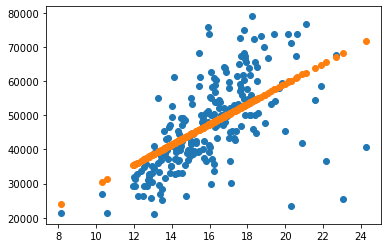

In [8]:
plt.scatter(datos['COSTO'], datos['VENTA'])
plt.scatter(datos['COSTO'].dropna(), r_1.predict())
plt.show()

In [9]:
datos['Y'] = datos['FECHAS'].dt.year
datos['M'] = datos['FECHAS'].dt.month
datos

,FECHAS,VENTA,COSTO,Y,M
0,2018-01-07,36524.45,17.059945,2018,1
1,2018-01-14,56821.00,16.280632,2018,1
2,2018-01-21,61369.15,17.445261,2018,1
3,2018-01-28,38902.72,14.814069,2018,1
4,2018-02-04,45286.00,19.977171,2018,2
...,...,...,...,...,...
234,2022-07-03,45891.00,18.289567,2022,7
235,2022-07-10,50705.00,15.811113,2022,7
236,2022-07-17,43357.00,17.272049,2022,7
237,2022-07-24,47247.00,15.667350,2022,7


In [10]:
modelo_1 = smf.ols('VENTA ~ COSTO + Y', data=datos)
r_1 = modelo_1.fit()
r_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  VENTA   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.445
Method:                 Least Squares   F-statistic:                     92.06
Date:                Thu, 18 Aug 2022   Prob (F-statistic):           6.13e-30
Time:                        18:58:53   Log-Likelihood:                -2410.2
No. Observations:                 228   AIC:                             4826.
Df Residuals:                     225   BIC:                             4837.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.039e+06   1.04e+06     -4.844      0.000   -7.09e+06   -2.99e+06
COSTO       2653.7032    288.861      9.187      0.000    2084.484    3222.922
Y           2496.9852    516.051      4.839      0.000    1480.074    3513.897
==============================================================================
Omnibus:                       22.479   Durbin-Watson:                   1.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.181
Skew:                          -0.352   Prob(JB):                     1.16e-14
Kurtosis:                       5.502   Cond. No.                     3.34e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.34e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

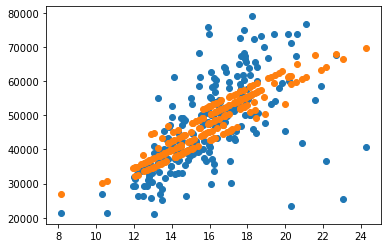

In [11]:
plt.scatter(datos['COSTO'], datos['VENTA'])
plt.scatter(datos['COSTO'].dropna(), r_1.predict())
plt.show()